In [5]:
%matplotlib inline
import time
import os
import csv
import matplotlib.pyplot as plt
from random import shuffle, sample
from matplotlib import cm
import pylab as pl
from IPython import display

In [6]:
MIN = 1
MAX = 2
AVG = 3
num_dims = 2
NUM_CLUSTERS = 3
cmode = AVG

data_file = csv.DictReader(open('dataset1.csv'))
HEADERS = ["f_0", "f_1"]
NUM_DIMENSIONS = min(num_dims, len(HEADERS))

# map number of cluster to points
clusters_to_points = {}
points_to_clusters = {}

X = []
for j, row in enumerate(data_file):
    _x = []
    for i in range(NUM_DIMENSIONS):
        _x.append(float(row[HEADERS[i]]))
    X.append(tuple(_x))
shuffle(X)

for j, _x in enumerate(X):
    clusters_to_points[j] = [_x]
    points_to_clusters[_x] = j

In [7]:
def dist(point1, point2, dim):
    dis = 0
    for i in range(dim):
        dis += (point1[i] - point2[i]) ** 2
    return dis ** 0.5

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def mode_dist(distances, mode):
    if mode == MIN:
        return min(distances)
    elif mode == MAX:
        return max(distances)
    else:
        return mean(distances)

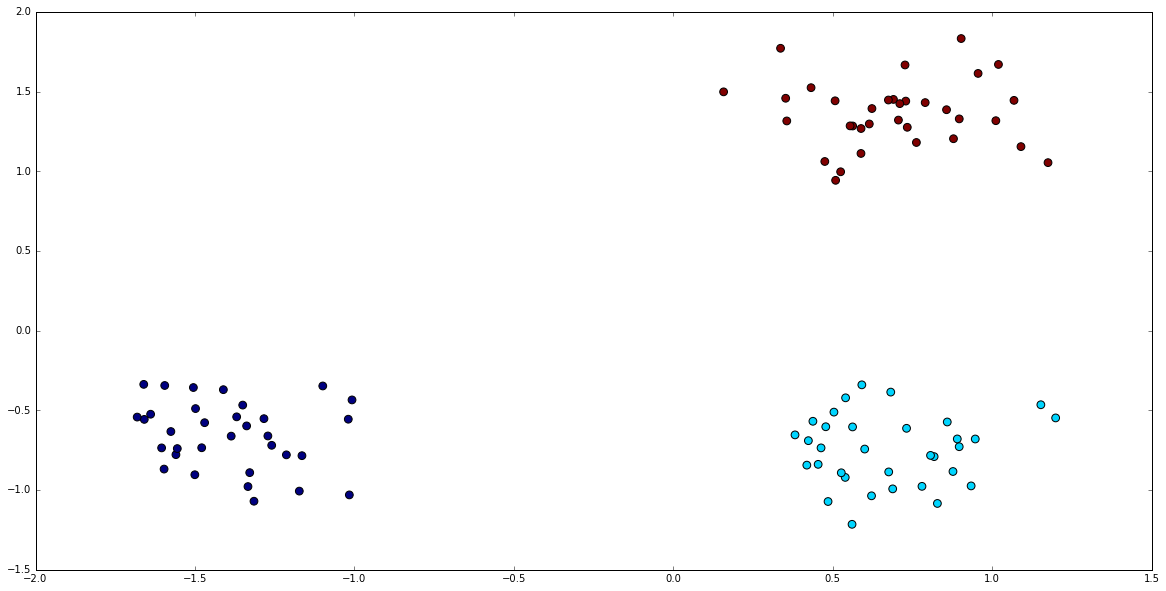

In [8]:
if NUM_DIMENSIONS == 2:
    plt.figure(figsize=(20,10))
    # plt.axis([-100, 100, -100, 100])
    plt.ion()

while True:
    if len(clusters_to_points) == NUM_CLUSTERS:
        break
    
    mn = 1 << 64
    ci = -1
    cj = -1
    for _ci, pointsi in clusters_to_points.iteritems():
        for _cj, pointsj in clusters_to_points.iteritems():
            if _ci != _cj:
                distances = []
                for pointi in pointsi:
                    for pointj in pointsj:
                        distances.append(dist(pointi, pointj, NUM_DIMENSIONS))
                dis = mode_dist(distances, cmode)
                if dis < mn:
                    mn = dis
                    ci = _ci
                    cj = _cj
    
    _ci = min(ci, cj)
    _cj = max(ci, cj)
    ci = _ci
    cj = _cj
    for point in clusters_to_points[cj]:
        points_to_clusters[point] = ci
    clusters_to_points[ci].extend(clusters_to_points[cj])
    del clusters_to_points[cj]

if NUM_DIMENSIONS == 2:
    xx = []
    yy = []
    zz = []
    for point, cluster_idx in points_to_clusters.iteritems():
        xx.append(point[0])
        yy.append(point[1])
        zz.append(cluster_idx)
    # Added specifically for ipython notebooks to see the live figure changes
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.scatter(xx, yy, s=60, c=zz, marker='o', cmap=cm.jet);
    plt.pause(1)